Import libraries and Data

In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

Data = pd.read_csv('Data/Q4.csv')

Let see how is our Data

In [430]:
Data

,Customer Id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,3JUN0VW6F043,34,Private Sector/Self Employed,Yes,1300000,6,0,Yes,No,No
1,VLHY2ABIR4QL,28,Private Sector/Self Employed,Yes,750000,7,0,Yes,No,No
2,6E3F7UNXYNFF,28,Private Sector/Self Employed,Yes,750000,6,0,Yes,No,No
3,JJ8R0ZRYWR31,32,Government Sector,Yes,800000,6,1,No,No,No
4,2WGFUEX6IEHM,34,Private Sector/Self Employed,Yes,700000,4,1,No,No,No
...,...,...,...,...,...,...,...,...,...,...
1585,W9JDK752JWHA,29,Private Sector/Self Employed,Yes,600000,3,0,No,No,No
1586,2JEE5P5T9MT0,34,Private Sector/Self Employed,Yes,850000,3,1,No,Yes,No
1587,797K83M5QWO2,34,Private Sector/Self Employed,No,1300000,4,0,No,No,No
1588,8V9QYC8TCCMF,33,Government Sector,Yes,400000,5,0,No,No,No


In [431]:
Data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,1590.000000,1.590000e+03,1590.000000,1590.000000
mean,29.642138,9.285535e+05,4.753459,0.279874
std,2.914275,3.752353e+05,1.610490,0.449078
min,25.000000,3.000000e+05,2.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000


Amount of missing values ( no missing value )

In [432]:
for i in Data.columns.values:
    if Data[i].isnull().sum() > 0:
        print(i)
        print(Data[i].isnull().sum())
        print(Data[i].notna().sum())

Evaluate values in columns ( all of them are alright )

In [433]:
# Employment Type is ok
ss = set()
for i in Data['Employment Type'].values:
    ss.add(i)
ss

{'Government Sector', 'Private Sector/Self Employed'}

In [434]:
# FamilyMembers is ok
ss = set()
for i in Data['FamilyMembers'].values:
    ss.add(i)
ss

{2, 3, 4, 5, 6, 7, 8, 9}

In [435]:
# GraduateOrNot is ok
ss = set()
for i in Data['GraduateOrNot'].values:
    ss.add(i)
ss

{'No', 'Yes'}

In [436]:
# ChronicDiseases is ok
ss = set()
for i in Data['ChronicDiseases'].values:
    ss.add(i)
ss

{0, 1}

In [437]:
# FrequentFlyer is ok
ss = set()
for i in Data['FrequentFlyer'].values:
    ss.add(i)
ss

{'No', 'Yes'}

In [438]:
# EverTravelledAbroad is ok
ss = set()
for i in Data['EverTravelledAbroad'].values:
    ss.add(i)
ss

{'No', 'Yes'}

In [439]:
# TravelInsurance is ok
ss = set()
for i in Data['TravelInsurance'].values:
    ss.add(i)
ss

{'No', 'Yes'}

Useless column, ID doesnt have values in learning

In [440]:
Data = Data.drop(columns= ['Customer Id'])

- Before feature scaling we should see we can use normalisation or standardisation
- So now we check if our data ditribution is normal or not
- we can see that columns are not normal, so we use standardisation

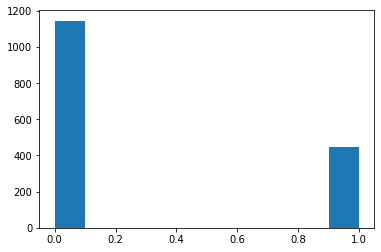

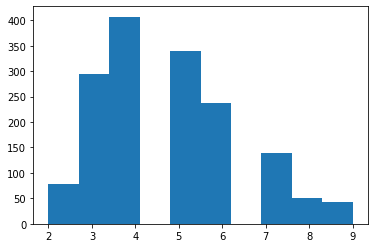

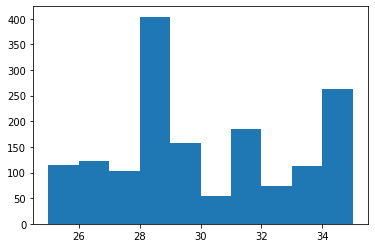

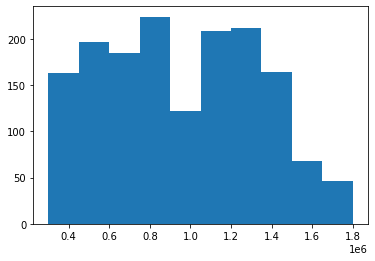

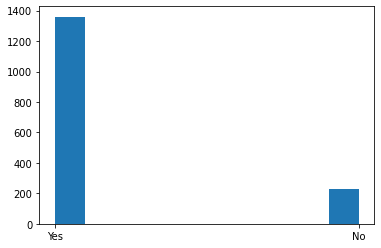

In [441]:
plt.hist(Data['ChronicDiseases'])
plt.show()
plt.hist(Data['FamilyMembers'])
plt.show()
plt.hist(Data['Age'])
plt.show()
plt.hist(Data['AnnualIncome'])
plt.show()
plt.hist(Data['GraduateOrNot'])
plt.show()
# 'ChronicDiseases','FamilyMembers', 'Age', 'AnnualIncome', 'Employment Type', 'GraduateOrNot'
#             , 'FrequentFlyer','EverTravelledAbroad', 'TravelInsurance'

Using pairplot to select best model, logistic wont be helpful no line can be drew between data
- Many overlaping with annual income so K-NN and random forest are selected

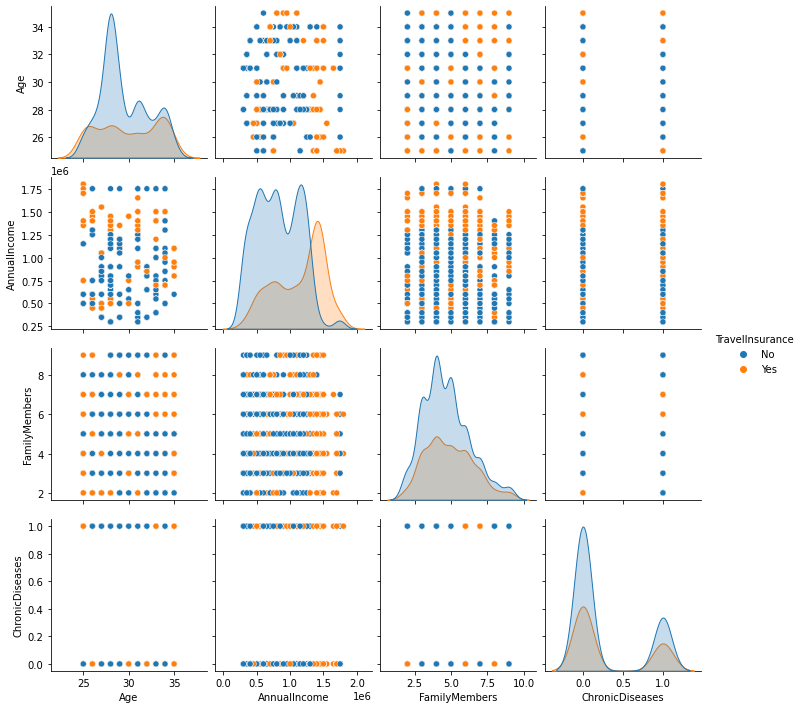

In [442]:
sns.pairplot(Data, hue='TravelInsurance')
plt.show()

Rearrenge data

In [443]:
Data.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [444]:
Data = Data[['ChronicDiseases','FamilyMembers', 'Age', 'AnnualIncome', 'Employment Type', 'GraduateOrNot'
            , 'FrequentFlyer','EverTravelledAbroad', 'TravelInsurance']]

Obtain dependant and independant

In [445]:
x = Data.iloc[:, :-1].values
y = Data.iloc[:, -1].values

Encoding categorical data with OneHotencoder

In [446]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5,6,7])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0 6 34 1300000]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0 7 28 750000]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0 6 28 750000]
 [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1 6 32 800000]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1 4 34 700000]
 [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1 6 28 300000]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 4 29 1100000]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 5 28 500000]
 [0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0 5 26 1500000]
 [1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0 3 31 400000]
 [0.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 0 5 28 1250000]
 [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0 7 33 700000]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 3 26 1250000]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 6 34 700000]
 [0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1 3 30 750000]
 [0.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1 7 29 1350000]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 0 5 30 1450000]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 5 29 500000]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1 5 28 800000]
 [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1 5 33 400000]
 [0.0 1.0 0.0

Encode dependant variable with label encoder

In [447]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 

Split to test and train with random_state = 98 and test_size = 0.2

In [448]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 98)

Scale Age, Annual income and FamilyMembers with Standardisation

In [449]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,-3:] = sc.fit_transform(x_train[:,-3:])
x_test[:,-3:] = sc.transform(x_test[:,-3:])

In [450]:
np.set_printoptions(threshold = np.inf)
print(x_train)

[[0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1 2.021847776898266 1.1812113025520465
  -0.4765317816956251]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 0.15462340210548212
  -0.5513772316340735 0.5859545045740243]
 [0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0 -0.46778472282544575
  -1.5909303521457456 2.046873148194792]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 -1.7126009726873015
  -0.5513772316340735 0.4531437187903181]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 -1.0901928477563736
  -0.20485952479684952 -1.5390180679652745]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0 -0.46778472282544575
  1.5277290093892706 -1.140585710614156]
 [0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1 -0.46778472282544575
  1.5277290093892706 0.18752214722290578]
 [0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0 0.15462340210548212
  -0.5513772316340735 1.3828192192762614]
 [0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1 0.77703152703641 1.5277290093892706
  1.5156300050599674]
 [1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1 1.3994396519673378 0.4881758888775985
  -1.4062072821815683]
 [1.0 0.0 0.0 1.0 1.0 0.

Using random forest ( K-NN also gave us similar results )
- n_estimators = 10 => small dataset therefore small amout of trees ( also gets best result )

In [451]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 98)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=98)

Evaluate model with confusion_matrix and obtain accuracy_score , recal and Precision

In [452]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy")
print(accuracy_score(y_test, y_pred))
print("Precision")
print(precision_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred))


[[183  27]
 [ 39  69]]
Accuracy
0.7924528301886793
Precision
0.71875
Recall
0.6388888888888888


plot and Diagram

In [453]:
# 'FamilyMembers', 'Employment Type', 'AnnualIncome' ,'FrequentFlyer'
# 'GraduateOrNot', 'Age', 'ChronicDiseases', 'EverTravelledAbroad'
markercolor = Data['TravelInsurance'].replace("No","red").replace("Yes","blue")

markershape = []
for i in y_pred:
    if i == 1:
        markershape.append('circle')
    else:
        markershape.append('square')


#Make Plotly figure
fig1 = go.Scatter3d(x=Data['FamilyMembers'],
                    y=Data['AnnualIncome'],
                    z=Data['Employment Type'],
                    marker=dict(
                                color = markercolor,
                                symbol = markershape,
                                opacity = 1,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout1 = go.Layout(scene=dict(xaxis=dict( title="FamilyMembers"),
                                yaxis=dict( title='Employment Type'),
                                zaxis=dict(title='AnnualIncome')),)


fig2 = go.Scatter3d(x=Data['ChronicDiseases'],
                    y=Data['GraduateOrNot'],
                    z=Data['Age'],
                    marker=dict(
                                color = markercolor,
                                symbol = markershape,
                                opacity = 1,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout2 = go.Layout(scene=dict(xaxis=dict( title="ChronicDiseases"),
                                yaxis=dict( title='GraduateOrNot'),
                                zaxis=dict(title='Age')),)

fig3 = go.Scatter3d(x=Data['EverTravelledAbroad'],
                    y=Data['FrequentFlyer'],
                    z=Data['TravelInsurance'],
                    marker=dict(color=markercolor,
                                symbol = markershape,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout3 = go.Layout(scene=dict(xaxis=dict( title='EverTravelledAbroad'),
                                yaxis=dict( title='FrequentFlyer'),
                                zaxis=dict(title='Age')),)


#Plot and save html
plotly.offline.iplot({"data": [fig1],
                     "layout": mylayout1},
                     filename=("6DPlot.html"))
plotly.offline.iplot({"data": [fig2],
                     "layout": mylayout2},
                     filename=("6DPlot.html"))
plotly.offline.iplot({"data": [fig3],
                     "layout": mylayout3},
                     filename=("6DPlot.html"))


Start our DL jurney
- Import tensorflow

In [454]:
import tensorflow as tf
tf.__version__

'2.11.0'

Again split x,y

In [455]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 98)

Standardization on whole data not only numerical ( it is necessary for DL )

In [456]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Initialization

In [457]:
ann = tf.keras.models.Sequential()

Input layer

In [458]:
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

Hidden layer

In [459]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

Output layer

In [460]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compile

In [461]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Train

We observe that after 100 accuracy doesnt change much, also we have tried for multiple neurons in hidden and input layer

In [462]:
history = ann.fit(x_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
40/40 [==============================] - 1s 1ms/step - loss: 0.6767 - accuracy: 0.6588
Epoch 2/150
40/40 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.6973
Epoch 3/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7469
Epoch 4/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7563
Epoch 5/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7649
Epoch 6/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.7634
Epoch 7/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7634
Epoch 8/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7634
Epoch 9/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.7673
Epoch 10/150
40/40 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7665
Epoch 11/

Epoch - Accuracy

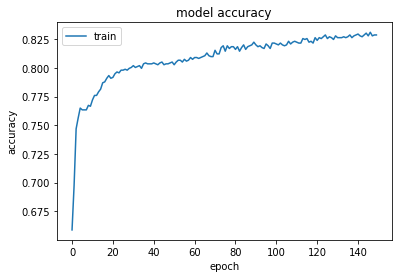

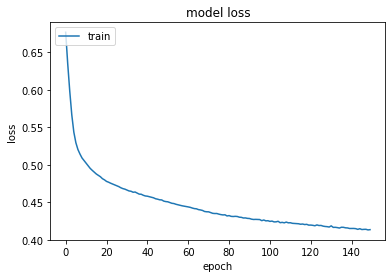

In [463]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predict our x_test, obtain y_pred, consider lower 0.5 zero and higher that 0.5 one, that is cz sigmoid in output layer

In [464]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

10/10 [==============================] - 0s 1ms/step


Calculate confusion with sklearn function

In [465]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print("Accuracy")
print(accuracy_score(y_test, y_pred))
print("Precision")
print(precision_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred))

[[191  19]
 [ 39  69]]
Accuracy
0.8176100628930818
Precision
0.7840909090909091
Recall
0.6388888888888888


plot and Diagram

In [466]:
markercolor = Data['TravelInsurance'].replace("No","red").replace("Yes","blue")

markershape = []
for i in y_pred:
    if i == 1:
        markershape.append('circle')
    else:
        markershape.append('square')


#Make Plotly figure
fig1 = go.Scatter3d(x=Data['FamilyMembers'],
                    y=Data['AnnualIncome'],
                    z=Data['Employment Type'],
                    marker=dict(
                                color = markercolor,
                                symbol = markershape,
                                opacity = 1,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout1 = go.Layout(scene=dict(xaxis=dict( title="FamilyMembers"),
                                yaxis=dict( title='Employment Type'),
                                zaxis=dict(title='AnnualIncome')),)


fig2 = go.Scatter3d(x=Data['ChronicDiseases'],
                    y=Data['GraduateOrNot'],
                    z=Data['Age'],
                    marker=dict(
                                color = markercolor,
                                symbol = markershape,
                                opacity = 1,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout2 = go.Layout(scene=dict(xaxis=dict( title="ChronicDiseases"),
                                yaxis=dict( title='GraduateOrNot'),
                                zaxis=dict(title='Age')),)

fig3 = go.Scatter3d(x=Data['EverTravelledAbroad'],
                    y=Data['FrequentFlyer'],
                    z=Data['TravelInsurance'],
                    marker=dict(color=markercolor,
                                symbol = markershape,
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout3 = go.Layout(scene=dict(xaxis=dict( title='EverTravelledAbroad'),
                                yaxis=dict( title='FrequentFlyer'),
                                zaxis=dict(title='Age')),)


#Plot and save html
plotly.offline.iplot({"data": [fig1],
                     "layout": mylayout1},
                     filename=("6DPlot.html"))
plotly.offline.iplot({"data": [fig2],
                     "layout": mylayout2},
                     filename=("6DPlot.html"))
plotly.offline.iplot({"data": [fig3],
                     "layout": mylayout3},
                     filename=("6DPlot.html"))